In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, cauchy, t

In [2]:
rng = np.random.default_rng(33)

*2.* Generate 100 observations from a $N(0,1)$ distribution. Compute a 95 percent confidence band for the cdf F (as described in the appendix). Repeat this 1000 times and see how often the confidence band contains the true distribution function. Repeat using data from a Cauchy distribution.

In [3]:
n_norm=100
alpha_norm= 0.05
epsilon_norm=np.sqrt(1/(2*n_norm)*np.log(2/alpha_norm))

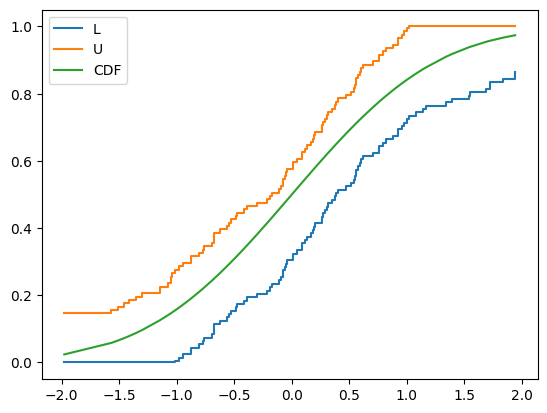

In [4]:
# 95% confidence band for Normal cdf

x_norm = rng.normal(0, 1, size=n_norm)
x_norm_sorted = np.sort(x_norm)
ecdf_norm = np.arange(1,n_norm+1)/n_norm
l_norm = np.maximum(ecdf_norm - epsilon_norm, 0)
u_norm = np.minimum(ecdf_norm + epsilon_norm, 1)
cdf_norm = norm.cdf(x_norm_sorted)

plt.step(x_norm_sorted, l_norm, where='post', label='L')
plt.step(x_norm_sorted, u_norm, where='post', label='U')
plt.plot(x_norm_sorted, cdf_norm, label='CDF')
plt.legend()
plt.show()

In [5]:
n_cauchy=100
alpha_cauchy= 0.05
epsilon_cauchy=np.sqrt(1/(2*n_cauchy)*np.log(2/alpha_cauchy))

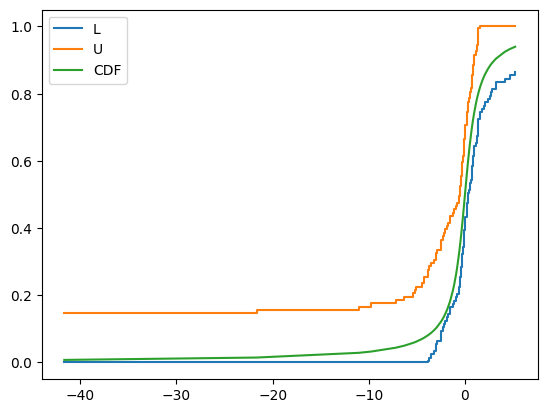

In [6]:
# 95% confidence band for Cauchy cdf

x_cauchy = rng.standard_cauchy(size=n_cauchy)
x_cauchy_sorted = np.sort(x_cauchy)
ecdf_cauchy = np.arange(1,n_cauchy+1)/n_cauchy
l_cauchy = np.maximum(ecdf_cauchy - epsilon_cauchy, 0)
u_cauchy = np.minimum(ecdf_cauchy + epsilon_cauchy, 1)
cdf_cauchy = cauchy.cdf(x_cauchy_sorted)

plt.step(x_cauchy_sorted, l_cauchy, where='post', label='L')
plt.step(x_cauchy_sorted, u_cauchy, where='post', label='U')
plt.plot(x_cauchy_sorted, cdf_cauchy, label='CDF')
plt.legend()
plt.show()

The confidence band contains the true distribution, i.e.,
$$
\widehat{F}_n(x)-\epsilon_n \leq F(x) \leq \widehat{F}_n(x)+\epsilon_n \qquad \forall x
$$
iff
$$
\sup_x | \widehat{F}_n(x) - F(x) | < \epsilon_n. 
$$

**Lemma.** $\sup_x | \widehat{F}_n(x) - F(x) | = \max \{ D^+ , D^- \}$ where $D^+ \coloneqq \max_{1 \leq i \leq n} \{ \frac{i}{n} - F(X_{(i)}) \}$ and $D^- \coloneqq \max_{1 \leq i \leq n} \{ F(X_{(i)}-) - \frac{i-1}{n} \}$.

_Proof._ Note that 
$$
\sup_x \| \widehat{F}_n(x) - F(x) \| = \max \left\{ \sup_x \left(\widehat{F}_n(x)-F(x)\right), \, \sup_x \left(F(x)-\widehat{F}_n(x)\right) \right\}.
$$
So it suffices to show
$$
D^+ = \sup_x \left(\widehat{F}_n(x)-F(x)\right) \qquad \text{ and } \qquad D^- = \sup_x \left(F(x)-\widehat{F}_n(x)\right).
$$
First note that $D^+ \leq \sup_x \left(\widehat{F}_n(x)-F(x)\right)$ since $\widehat{F}(X_{(i)}) = i/n$. For the converse, note that for $x \in [X_{(i)}, X_{(i+1)}]$ (with $i = 1, \dots, n-1$)
$$
\widehat{F}_n(x)-F(x) = \frac{i}{n} - F(x).
$$
Hence, 
$$ 
\sup_{X_{(i)} \leq x \leq X_{(i+1)}} \left( \widehat{F}_n(x)-F(x) \right) = \sup_{X_{(i)} \leq x \leq X_{(i+1)}} \left( \frac{i}{n} - F(x) \right) = \frac{i}{n} - F(X_{(i)})
$$
where the last equality is because $\frac{i}{n} - F(x)$ achieves its maximum at the left endpoint of the interval $X_{(i)}$ since $F$ is non-decreasing. The $(X_{(n)}, \infty)$ case is handled similarily. For $x \in (-\infty, X_{(1)})$ we have $\widehat{F}_n(x) = 0$ so
$$
\sup_{x \leq X_{(1)}} \left( \widehat{F}_n(x)-F(x) \right) = \sup_{x \leq X_{(1)}} \left( -F(x) \right) = 0 \leq D^+
$$
where the last inequality can be seen by setting $i=n$ in the definition of $D^+$. Taking the supremum over all intervals we obtain $\sup_x \left(\widehat{F}_n(x)-F(x)\right) \leq D^+$. This concludes the proof of the first equality. The other equality $D^- = \sup_x \left(F(x)-\widehat{F}_n(x)\right)$ is handled similarly but noting that $F(x) - \frac{i-1}{n}$ achieves its maximum at the right endpoint of $[X_{(i)}, X_{(i+1)})$ which is the left limit $X_{(i+1)}-$. Reindexing with $j=i+1$ yields,
$$
F(X_{(i+1)}-) - \frac{i}{n} = F(X_{(j)}-) - \frac{j-1}{n}
$$
for $j = 2, \dots, n$. The infinite interval cases are handled similarly (but the other way around).

In [7]:
# proportion of times Normal cdf is contained in the band

m_norm = 1000
count_norm = 0
for seed in range(m_norm):
    rng = np.random.default_rng(seed)
    x_norm = rng.normal(0, 1, size=n_norm)
    x_norm_sorted = np.sort(x_norm)
    cdf_norm = norm.cdf(x_norm_sorted)
    i_norm = np.arange(1, n_norm+1)
    D_plus_norm = np.max(i_norm/n_norm - cdf_norm)
    D_minus_norm = np.max(cdf_norm - (i_norm-1)/n_norm)
    # for F discontinous, we need:
    # eps = 1e-10
    # F_left = cdf(x_sorted - eps)
    # D_minus = np.max(F_left - (np.arange(1, n+1) - 1)/n)
    # in order to account for the left limit in D^-.
    count_norm += max(D_plus_norm, D_minus_norm) <= epsilon_norm
print(count_norm/m_norm)

0.948


In [8]:
# proportion of times Cauchy cdf is contained in the band

m_cauchy=1000
count_cauchy = 0
for seed in range(m_cauchy):
    rng = np.random.default_rng(seed)
    x_cauchy = rng.standard_cauchy(size=n_cauchy)
    x_cauchy_sorted = np.sort(x_cauchy)
    cdf_cauchy = cauchy.cdf(x_cauchy_sorted)
    i_cauchy = np.arange(1, n_cauchy+1)
    D_plus_cauchy = np.max(i_cauchy/n_cauchy - cdf_cauchy)
    D_minus_cauchy = np.max(cdf_cauchy - (i_cauchy-1)/n_cauchy)
    count_cauchy += max(D_plus_cauchy, D_minus_cauchy) <= epsilon_cauchy
print(count_cauchy/m_cauchy)

0.952


**7.** Data on the magnitudes of earthquakes near Fiji are available on the website for this book. Estimate the cdf $F(x)$. Compute and plot a 95 percent confidence envelope for $F$. Find an approximate 95 percent confidence interval for $F(4.9)− F(4.3)$.

In [9]:
fijiquakes = pd.read_csv("fijiquakes.dat.txt", sep=r"\s+")
fijiquakes.head()

,Obs.,lat,long,depth,mag,stations
0,1,-20.42,181.62,562,4.8,41
1,2,-20.62,181.03,650,4.2,15
2,3,-26.00,184.10,42,5.4,43
3,4,-17.97,181.66,626,4.1,19
4,5,-20.42,181.96,649,4.0,11


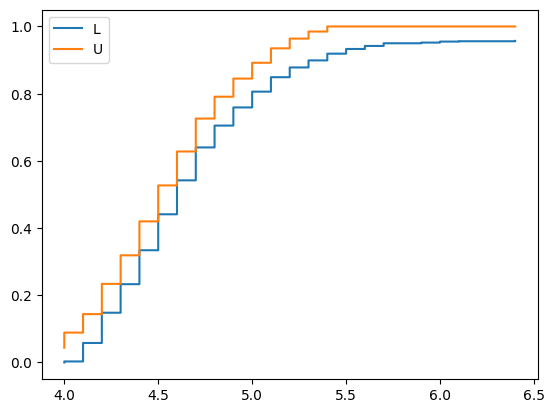

In [10]:
# 95% confidence envelope for F

x_fiji = fijiquakes['mag'].to_numpy()
x_fiji_sorted = np.sort(x_fiji)
ecdf_fiji = np.arange(1,len(x_fiji)+1)/len(x_fiji)
epsilon_fiji = np.sqrt(1/(2*len(x_fiji))*np.log(2/0.05))
l_fiji = np.maximum(ecdf_fiji - epsilon_fiji, 0)
u_fiji = np.minimum(ecdf_fiji + epsilon_fiji, 1)
plt.step(x_fiji_sorted, l_fiji, where='post', label='L')
plt.step(x_fiji_sorted, u_fiji, where='post', label='U')
plt.legend()
plt.show()

In [11]:
def empirical_cdf(data, value):
    data = np.sort(data)
    return np.searchsorted(data, value, side='right') / len(data)

# By exercise 6,

theta_hat_fiji = empirical_cdf(fijiquakes['mag'], 4.9) - empirical_cdf(fijiquakes['mag'], 4.3)
sigma_hat_fiji = np.sqrt((theta_hat_fiji)*(1-theta_hat_fiji)/len(x_fiji))
print(str(theta_hat_fiji) + ' ± 2 * ' + str(sigma_hat_fiji) + ' is a 95% CI of F(4.9)-F(4.3)')

0.526 ± 2 * 0.01578999683343857 is a 95% CI of F(4.9)-F(4.3)


In [12]:
# Alternative way to calculate theta_hat

theta_hat_fiji_1 = np.mean((x_fiji > 4.3) & (x_fiji <= 4.9))
print(theta_hat_fiji_1)

0.526


**9.** Get the data on eruption times and waiting times between eruptions of the Old Faithful geyser from the website. Estimate the mean waiting time and give a standard error for the estimate. Also, give a 90 percent confidence interval for the mean waiting time. Now estimate the median waiting time.

In [13]:
faithful = pd.read_csv(
    "faithful.dat.txt",
    sep=r"\s+",
    header=None,
    skiprows=26,
    names=["idx", "eruptions", "waiting"],
    engine="python",
).drop(columns="idx")
faithful.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [14]:
x_wait = faithful['waiting']
mu_hat_wait = x_wait.mean()
se_wait = x_wait.std(ddof=0)/np.sqrt(len(x_wait))
tcrit_wait = t.ppf(0.95, df=len(x_wait)-1) # 95% percentile of the t-distribution with len(x)-1 degrees of freedom
print(str(mu_hat_wait) + ' ± ' + str(tcrit_wait) + ' * ' + str(se_wait) + 'is a 90% CI for the mean.')
median_hat_wait = x_wait.median() # estimator for medidan is the sample median \hat{F}_n^{-1}(1/2)
print(median_hat_wait)

70.8970588235294 ± 1.6504957788175254 * 0.8227996836458397is a 90% CI for the mean.
76.0
